In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
# Load the data
# Cars = pd.read_csv('cars.csv')
df = pd.read_csv('CARS_1.csv')
df.isnull().sum()
df['seating_capacity'].fillna(df['seating_capacity'].mean(), inplace = True)
df.isnull().sum()
df['fuel_tank_capacity'] = df['fuel_tank_capacity'].apply(lambda x:x+5)
Cars = df.rename(columns={
    'fuel_type': 'Fuel', 
    'fuel_tank_capacity': 'Tank_size', 
    'reviews_count': 'Reviews', 
    'car_name': 'Car', 
    'seating_capacity': 'Seat', 
    'body_type': 'Build', 
    'max_power_bhp': 'Power', 
    'transmission_type': 'Transmission', 
    'max_torque_nm': 'Torque', 
    'ending_price': 'Max_price',
    'engine_displacement': 'Engine',
    'rating': 'Rating',
    'no_cylinder': 'Cylinders', 
    'max_power_rp': 'Max_Power_RPM', 
    'max_torque_rpm': 'Max_Torque_RPM', 
    'starting_price': 'Starting_Price'
})
# Cars
Cars["Price"] = (Cars['Starting_Price'] + Cars['Max_price'])/2
Cars


,Car,Reviews,Fuel,Engine,Cylinders,Seat,Transmission,Tank_size,Build,Rating,Starting_Price,Max_price,Torque,Max_Torque_RPM,Power,Max_Power_RPM,Price
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,32.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500,491000.0
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,53.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000,1097500.0
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,62.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750,1478000.0
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,65.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500,1888000.0
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,62.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500,1794500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Mercedes-Benz AMG A 45 S,35,Petrol,1991,4,5.0,Automatic,5.0,Hatchback,4.5,659000,999000,500.0,5250,415.71,6750,829000.0
199,BMW 3 Series Gran Limousine,3,Petrol,1998,4,5.0,Automatic,64.0,Sedan,4.5,1041000,1041000,400.0,4400,254.79,5000,1041000.0
200,MG Hector Plus,2,Diesel,1956,4,7.0,Manual,65.0,SUV,4.5,1615000,2075000,350.0,2500,167.67,3750,1845000.0
201,Audi RS Q8,9,Petrol,3998,8,5.0,Automatic,90.0,SUV,3.5,21700000,21700000,800.0,4500,591.39,6000,21700000.0


In [13]:
# encoder = OneHotEncoder()
# encoded = encoder.fit_transform(Cars[['Fuel', 'Transmission', 'Build']])
# encoded_df = pd.DataFrame(encoded.toarray())
# if hasattr(encoder, 'get_feature_names_out'):
#     # scikit-learn version >= 0.22
#     encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
# else:
#     # scikit-learn version < 0.22
#     encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])
# X = pd.concat([Cars.drop(['Car', 'Fuel', 'Transmission', 'Build', 'Price'], axis=1), encoded_df], axis=1)
# y = Cars['Price']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X

,Reviews,Engine,Cylinders,Seat,Tank_size,Rating,Starting_Price,Max_price,Torque,Max_Torque_RPM,...,Build_Coupe,Build_Hatchback,Build_Hybrid,Build_Luxury,Build_MUV,Build_Minivan,Build_Pickup Truck,Build_SUV,Build_Sedan,Build_Wagon
0,51,998,3,5.0,32.0,4.5,399000,583000,89.0,3500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86,1462,4,5.0,53.0,4.5,799000,1396000,136.8,4400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,242,2184,4,4.0,62.0,4.5,1353000,1603000,300.0,2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,313,2198,4,7.0,65.0,4.5,1318000,2458000,450.0,2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,107,2198,4,7.0,62.0,4.5,1199000,2390000,400.0,2750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,35,1991,4,5.0,5.0,4.5,659000,999000,500.0,5250,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,3,1998,4,5.0,64.0,4.5,1041000,1041000,400.0,4400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
200,2,1956,4,7.0,65.0,4.5,1615000,2075000,350.0,2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,9,3998,8,5.0,90.0,3.5,21700000,21700000,800.0,4500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
y

0        491000.0
1       1097500.0
2       1478000.0
3       1888000.0
4       1794500.0
          ...    
198      829000.0
199     1041000.0
200     1845000.0
201    21700000.0
202      394000.0
Name: Price, Length: 203, dtype: float64

R-squared score:  0.9800483885171876
Mean absolute error:  659754.512195122


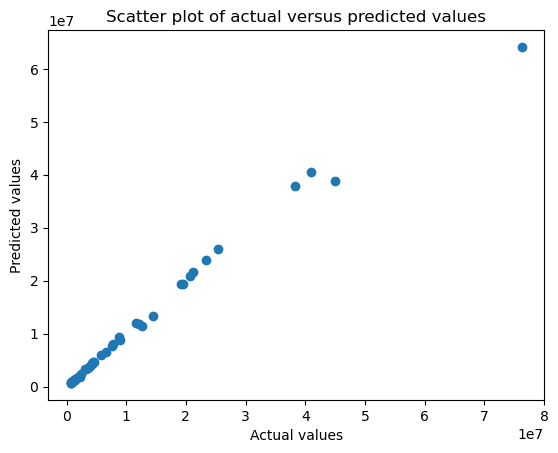

In [14]:
# Fit a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("R-squared score: ", r2)
print("Mean absolute error: ", mae)

import matplotlib.pyplot as plt

# Create a scatter plot of the actual versus predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of actual versus predicted values')
plt.show()

In [17]:
# # Make a prediction on a new data point
# new_data = pd.DataFrame([[51, 998, 3, 5.0, 32.0, 4.5, 399000, 583000, 89.0, 3500, 65.71, 5500, 'Petrol', 'Automatic', 'Hatchback']], 
#                         columns=['Reviews', 'Engine', 'Cylinders', 'Seat', 'Tank_size', 'Rating', 'Starting_Price', 'Max_price',
#                                  'Torque', 'Max_Torque_RPM', 'Power', 'Max_Power_RPM', 'Fuel', 'Transmission', 'Build'])
# new_encoded = encoder.transform(new_data[['Fuel', 'Transmission', 'Build']])
# new_encoded_df = pd.DataFrame(new_encoded.toarray())
# if hasattr(encoder, 'get_feature_names_out'):
#     # scikit-learn version >= 0.22
#     new_encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
# else:
#     # scikit-learn version < 0.22
#     new_encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])
# new_data = pd.concat([new_data.drop(['Fuel', 'Transmission', 'Build'], axis=1), new_encoded_df], axis=1)
# pred = model.predict(new_data)
# print(pred)

[493550.]


In [20]:
# import os
# import pickle

# # Train the model
# # model = linear_model.LinearRegression()
# # model.fit(X, y)

# # Save the model as a pickle file in the current working directory
# filename = 'random_forest_regression_model.pkl'
# with open(os.path.join(os.getcwd(), filename), 'wb') as f:
#     pickle.dump(model, f)

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Load the data
df = pd.read_csv('CARS_1.csv')
df['seating_capacity'].fillna(df['seating_capacity'].mean(), inplace=True)
df['fuel_tank_capacity'] = df['fuel_tank_capacity'].apply(lambda x: x + 5)
Cars = df.rename(columns={
    'fuel_type': 'Fuel',
    'fuel_tank_capacity': 'Tank_size',
    'reviews_count': 'Reviews',
    'car_name': 'Car',
    'seating_capacity': 'Seat',
    'body_type': 'Build',
    'max_power_bhp': 'Power',
    'transmission_type': 'Transmission',
    'max_torque_nm': 'Torque',
    'ending_price': 'Max_price',
    'engine_displacement': 'Engine',
    'rating': 'Rating',
    'no_cylinder': 'Cylinders',
    'max_power_rp': 'Max_Power_RPM',
    'max_torque_rpm': 'Max_Torque_RPM',
    'starting_price': 'Starting_Price'
})
Cars["Price"] = (Cars['Starting_Price'] + Cars['Max_price']) / 2

# One-hot encode the categorical variables
encoder = OneHotEncoder()
encoded = encoder.fit_transform(Cars[['Fuel', 'Transmission', 'Build']])
encoded_df = pd.DataFrame(encoded.toarray())
if hasattr(encoder, 'get_feature_names_out'):
    # scikit-learn version >= 0.22
    encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
else:
    # scikit-learn version < 0.22
    encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])

# Concatenate the encoded features with the original features
X = pd.concat([Cars.drop(['Car', 'Fuel', 'Transmission', 'Build', 'Price'], axis=1), encoded_df], axis=1)
y = Cars['Price']

# Fit a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Ask the user to enter the values for the new data point
reviews = float(input("Enter the number of reviews: "))
engine = float(input("Enter the engine displacement in cc: "))
cylinders = float(input("Enter the number of cylinders: "))
seat = float(input("Enter the seating capacity: "))
tank_size = float(input("Enter the fuel tank capacity in litres: "))
rating = float(input("Enter the rating out of 5: "))
starting_price = float(input("Enter the starting price in INR lakhs: "))
max_price = float(input("Enter the maximum price in INR lakhs: "))
torque = float(input("Enter the maximum torque in Nm: "))
max_torque_rpm = float(input("Enter the RPM at which the maximum torque is produced: "))
power = float(input("Enter the maximum power in bhp: "))
max_power_rpm = float(input("Enter the RPM at which the maximum power is produced: "))
fuel = input("Enter the fuel type (Petrol/Diesel/CNG/Electric): ")
transmission = input("Enter the transmission type (Manual/Automatic): ")
body_type = input("Enter the body type (Hatchback/Sedan/SUV/etc.): ")

# Create a DataFrame for the new data point
new_data = pd.DataFrame([[reviews, engine, cylinders, seat, tank_size, rating, starting_price, max_price, torque, max_torque_rpm, power, max_power_rpm, fuel, transmission, body_type]], 
                        columns=['Reviews', 'Engine', 'Cylinders', 'Seat', 'Tank_size', 'Rating', 'Starting_Price', 'Max_price', 'Torque', 'Max_Torque_RPM', 'Power', 'Max_Power_RPM', 'Fuel', 'Transmission', 'Build'])

# One-hot encode the categorical variables
new_encoded = encoder.transform(new_data[['Fuel', 'Transmission', 'Build']])
new_encoded_df = pd.DataFrame(new_encoded.toarray())
if hasattr(encoder, 'get_feature_names_out'):
    # scikit-learn version >= 0.22
    new_encoded_df.columns = encoder.get_feature_names_out(['Fuel', 'Transmission', 'Build'])
else:
    # scikit-learn version < 0.22
    new_encoded_df.columns = encoder.get_feature_names(['Fuel', 'Transmission', 'Build'])

# Concatenate the encoded features with the original features
new_data = pd.concat([new_data.drop(['Fuel', 'Transmission', 'Build'], axis=1), new_encoded_df], axis=1)

# Make a prediction on the new data point
pred = model.predict(new_data)

#Print the predicted price
print("The predicted price is:", pred[0])

Enter the number of reviews: 221
Enter the engine displacement in cc: 4832
Enter the number of cylinders: 5
Enter the seating capacity: 4
Enter the fuel tank capacity in litres: 57
Enter the rating out of 5: 4.5
Enter the starting price in INR lakhs: 1983000
Enter the maximum price in INR lakhs: 2558000
Enter the maximum torque in Nm: 338
Enter the RPM at which the maximum torque is produced: 4300
Enter the maximum power in bhp: 312
Enter the RPM at which the maximum power is produced: 5500
Enter the fuel type (Petrol/Diesel/CNG/Electric): Petrol
Enter the transmission type (Manual/Automatic): Manual
Enter the body type (Hatchback/Sedan/SUV/etc.): SUV
The predicted price is: 2040480.0


In [2]:
import os
import pickle

# Train the model
# model = linear_model.LinearRegression()
# model.fit(X, y)

# Save the model as a pickle file in the current working directory
filename = 'random_forest_regression1_model.pkl'
with open(os.path.join(os.getcwd(), filename), 'wb') as f:
    pickle.dump(model, f)